# Más ciruitos cuánticos

Cuando programamos ordenadores cuánticos, nuestro objetivo es siempre construir circuitos cuánticos útiles a partir de los bloques de construcción básicos. Pero a veces, puede que no tengamos todos los bloques de construcción básicos que queremos. En esta sección, veremos cómo podemos transformar puertas básicas entre sí, y cómo utilizarlas para construir algunas puertas que son un poco más complejas (pero todavía bastante básicas).


In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0 # sería el qubit de control
t = 1 # el qubit de target

##  Construyendo una Z controlada desde un CNOT. <a id="c-from-cnot"></a>

La [puerta Z controlada](zcontrolada) o `cz` (así se denomina en qiskit) es otra puerta de dos qubits muy utilizada. Al igual que la CNOT aplica una $X$ a su qubit de destino siempre que su control esté en estado $|1\rangle$, la puerta controlada-$Z$ aplica una $Z$ en el mismo caso. En Qiskit se puede invocar directamente con el siguiente código:


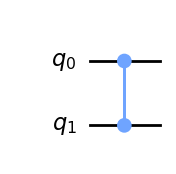

In [2]:
# a controlled-Z
qc.cz(c,t)
qc.draw(output='mpl')

donde c (control) y t (target) son los qubits de control y de destino. *En los dispositivos IBM Q, sin embargo, el único tipo de puerta de dos qubits que puede aplicarse directamente es la CNOT*. Por tanto en ese sistema, necesitamos una forma de transformar una en otra.

El proceso es bastante sencillo. Sabemos que la puerta de  Hadamard transforma los estados $|0\rangle$ y $|1\rangle$ a los estados $|+\rangle$ y $|-\rangle$ respectivamente. También sabemos que el efecto de la puerta $Z$ sobre los estados $|+\rangle$ y $|-\rangle$ es el mismo (en el sentido de que transforma un estado en otro) que el de $X$ sobre los estados $|0\rangle$ y $|1\rangle$ respectivamente. De este razonamiento, o de la simple multiplicación de matrices, resulta que


$$
H X H = Z,\\\\
H Z H = X.
$$

NOTA: observar que lo anterior, se puede obtener de una forma muy fácil, sin más que tener en cuenta que $H^{-1}=H$ entonces con esto, multiplicando los dos miembros de la igualdad anterior por $H=H^{-1}$ se obtiene el resultado anterior.

El mismo truco se puede utilizar para transformar un CNOT en un $Z$ controlado. Todo lo que tenemos que hacer es preceder y seguir el CNOT con un Hadamard en el qubit objetivo. Esto transformará cualquier $X$ aplicado a ese qubit en un $Z$.


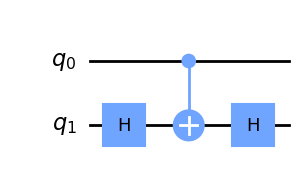

In [3]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw(output='mpl')


De forma más general, podemos transformar una CNOT simple en una versión controlada de cualquier rotación alrededor de la esfera de Bloch por un ángulo $\pi$, simplemente precediéndola y siguiéndola con las rotaciones correctas. Por ejemplo, **un $Y$ controlado**:

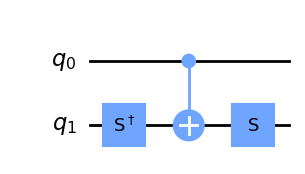

In [4]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw(output='mpl')

y un  **$H$ controlado**:

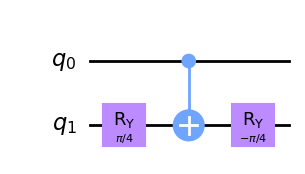

In [5]:
qc = QuantumCircuit(2)
# a controlled-H
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw(output='mpl')

## Intercambio de Qubits <a id="swapping"></a>

In [6]:
# Denominamos los qubits con estas letras
a = 0
b = 1

```{index} SWAP puerta
```
A veces necesitamos mover información en un ordenador cuántico. En algunas implementaciones de qubits, esto puede hacerse moviéndolos físicamente. Otra opción es simplemente mover el estado entre dos qubits. Esto se hace mediante la puerta SWAP.

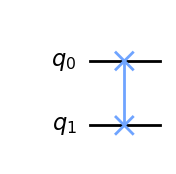

In [7]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw(output='mpl')

El comando anterior invoca directamente esta puerta, pero veamos *cómo podríamos hacerlo utilizando nuestro conjunto de puertas estándar*. Para ello, tendremos que considerar algunos ejemplos.

Primero veremos el caso de que el qubit a esté en el estado $|1\rangle$ y el qubit b esté en el estado $|0\rangle$. Para ello aplicaremos las siguientes puertas:

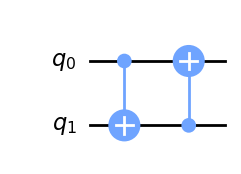

In [8]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw(output='mpl')

Según el esquema anterior, como el qubit a es uno la primera puerta CNOT transforma el qubit b a 1 (antes estaba en 0). Ahora la segunda puerta CNOT (X controlado), ve que el qubit de control (b en este caso) está a 1 y por lo tanto cambia el qubit target (a en este caso) del estado 1 al 0. Por lo tanto al final de todo este proceso, se ha pasado del estado $|01\rangle$ al estado $|10\rangle$. 

Esto tiene el efecto de poner el qubit b en el estado $|1\rangle$ y el qubit a en el estado $|0\rangle$. Al menos en este caso, hemos hecho un SWAP.

Ahora vamos a tomar este estado y SWAP de nuevo a la original. Como habrás adivinado, podemos hacerlo con el proceso inverso al anterior:

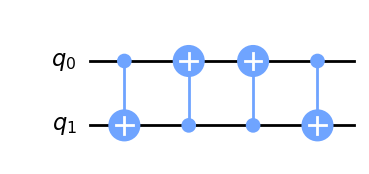

In [9]:
# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw(output='mpl')

Nótese que en estos dos procesos, la primera puerta de uno no tendría ningún efecto sobre el estado inicial del otro. Por ejemplo, cuando cambiamos el $|1\rangle$ b por a, la primera puerta es `cx(b,a)`. Si esto se aplicara a un estado en el que no hubiera ningún $|1\rangle$ inicialmente en b, no tendría ningún efecto.

Observe también que para estos dos procesos, la puerta final de uno no tendría ningún efecto sobre el estado final del otro. Por ejemplo, el `cx(b,a)` final que se requiere cuando cambiamos el $|1\rangle$ de a a b no tiene ningún efecto sobre el estado donde el $|1\rangle$ no está en b.

Con estas observaciones, podemos combinar los dos procesos añadiendo una puerta ineficaz de uno al otro. Por ejemplo,



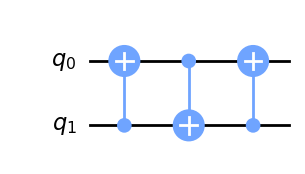

In [10]:
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw(output='mpl')

Podemos pensar en esto como un proceso que intercambia un $|1\rangle$ de a a b, pero con un inútil `qc.cx(b,a)` al principio (porque al principio como b esta en cero no haría ningún cambio el CNOT de la izquierda). También podemos pensar en ello como un proceso que intercambia un $|1\rangle$ de b a a, pero con un inútil `qc.cx(b,a)` al final. De cualquier manera, el resultado es un proceso que puede hacer el intercambio en ambos sentidos.

También tiene el efecto correcto en el estado $|00\rangle$. Esto es simétrico, por lo que el intercambio de los estados no debería tener ningún efecto. Dado que las puertas CNOT no tienen efecto cuando sus qubits de control son $|0\rangle$, el proceso correctamente no hace nada.

El estado $|11\rangle$ también es simétrico, por lo que necesita un efecto trivial del intercambio. En este caso, la primera puerta CNOT en el proceso anterior hará que la segunda no tenga efecto, y la tercera deshace la primera. Por lo tanto, todo el efecto es trivial.

Así, hemos encontrado una forma de descomponer las puertas SWAP en nuestro conjunto de puertas estándar de rotaciones de un solo qubit y puertas CNOT.


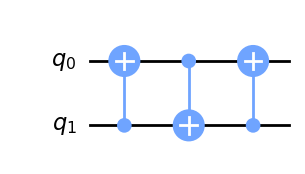

In [11]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw(output='mpl')

Funciona para los estados $|00\rangle$, $|01\rangle$, $|10\rangle$ y $|11\rangle$, y si funciona para todos los estados de la base de cálculo, debe funcionar para todos los estados en general. Por lo tanto, este circuito intercambia todos los estados posibles de dos qubits.

El mismo efecto se produciría si cambiáramos el orden de las puertas CNOT:

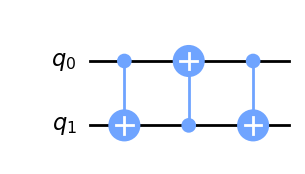

In [12]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw(output='mpl')

Por lo tanto este es un camino para obtener puertas del tipo  SWAP.

La derivación utilizada aquí se basó en gran medida en los estados de la base z, pero también podría hacerse pensando en lo que se necesita para intercambiar qubits en los estados $|+\rangle$ y $|-\rangle$. Las formas resultantes de implementar la puerta SWAP serán completamente equivalentes a las de aquí.


#### Quick Ejercicios:

- Encuentre un circuito diferente que intercambie qubits en los estados $|+\rangle$ y $|-\rangle$, y demuestre que es equivalente al circuito mostrado anteriormente.


##  Rotaciones controladas <a id="controlled-rotations"></a>

Ya hemos visto cómo construir rotaciones $\pi$ controladas a partir de una sola puerta CNOT. Ahora veremos cómo construir cualquier rotación controlada.

En primer lugar, consideremos rotaciones arbitrarias alrededor del eje y. Específicamente, considere la siguiente secuencia de puertas.

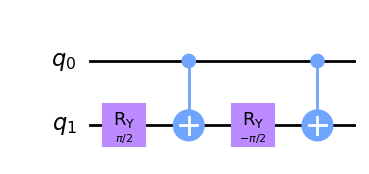

In [13]:
qc = QuantumCircuit(2)
theta = pi # theta puede ser cualquier valor (pi se ha elegido arbitrariamente)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw(output='mpl')

Si el qubit de control está en estado $|0\rangle$, todo lo que tenemos aquí es un $R_y(\theta/2)$ inmediatamente seguido de su inverso, $R_y(-\theta/2)$. El efecto final es trivial. Si el qubit de control está en el estado $|1\rangle$, sin embargo, el `ry(-theta/2)` es efectivamente precedido y seguido por una puerta X. Esto tiene el efecto de dar la vuelta al qubit. Esto tiene el efecto de invertir la dirección de la rotación  y hacer un segundo $R_y(\theta/2)$. El efecto neto en este caso **es, por tanto, hacer una versión controlada de la rotación $R_y(\theta)$**. 

Este método funciona porque los ejes x e y son ortogonales, lo que hace que las puertas x inviertan la dirección de la rotación. Por lo tanto, funciona de manera similar para hacer un controlado $ R_z(\theta)$. Un $R_x(\theta)$ controlado podría hacerse de manera similar utilizando puertas CNOT.

También podemos hacer una versión controlada de cualquier rotación de un solo qubit, $V$. Para ello sólo tenemos que encontrar tres rotaciones A, B y C, y una fase $\alpha$ tal que 



$$
ABC = I, ~~~e^{i\alpha}AZBZC = V
$$

A continuación, utilizamos puertas Z controladas para hacer que la primera de estas relaciones ocurra siempre que el control esté en el estado $|0\rangle$, y que la segunda ocurra cuando el control esté en el estado $|1\rangle$. También se utiliza una rotación $R_z(2\alpha)$ en el control para obtener la fase correcta, que será importante siempre que haya estados de superposición.


In [14]:
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit

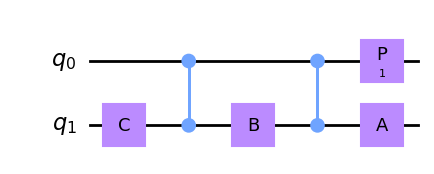

In [15]:
qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.p(alpha,c)
qc.draw(output='mpl')

![A controlled version of a gate V](images/iden1.png)

Aquí `A`, `B` y `C` son puertas que implementan $A$ , $B$ y $C$, respectivamente​.

## La puerta de Toffoli <a id="ccx"></a>

```{index} Toffoli
```

La puerta de Toffoli es una puerta de tres qubits con _dos controles y un objetivo_. Realiza una X en el objetivo sólo si ambos controles están en el estado $|1\rangle$. El estado final del objetivo es entonces igual a la AND o la NAND de los dos controles, dependiendo de si el estado inicial del objetivo era $|0\rangle$ o $|1\rangle$. Un Toffoli también se puede considerar como un controlado-controlado-NOT, y también se llama puerta CCX.


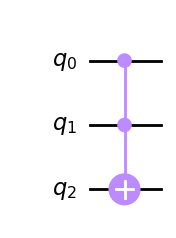

In [16]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw(output='mpl')

Para ver cómo construirlo a partir de puertas de uno y dos qubits, es útil mostrar primero cómo construir algo aún más general: una U arbitraria controlada-controlada para cualquier rotación de un solo qubit U. Para ello necesitamos definir versiones controladas de $V = \sqrt{U}$ y $V^\dagger$. En el código de abajo, usamos `cp(theta,c,t)` y `cp(-theta,c,t)` en lugar de las subrutinas indefinidas `cv` y `cvdg` respectivamente. Los controles son los qubits $a$ y $b$, y el objetivo es el qubit $t$.


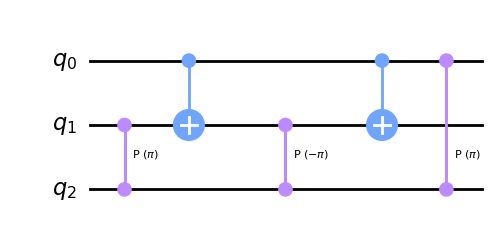

In [17]:
qc = QuantumCircuit(3)
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw(output='mpl')

![A doubly controlled version of a gate V](images/iden2.PNG)

Rastreando cada valor de los dos qubits de control, puedes convencerte de que se aplica una puerta U al qubit objetivo si y sólo si ambos controles son 1. Utilizando las ideas que ya hemos descrito, ahora podrías implementar cada puerta V controlada para llegar a algún circuito para la puerta U doblemente controlada. Resulta que el número mínimo de puertas CNOT necesarias para implementar la puerta Toffoli es seis .

![A Toffoli](images/iden3.PNG)

Se trata de una puerta de Toffoli con 3 qubits(q0,q1,q2) respectivamente. En este ejemplo de circuito, q0 está conectado con q2 pero q0 no está conectado con q1

La puerta de Toffoli no es la única forma de implementar una puerta AND en la informática cuántica. También podríamos definir otras puertas que tengan el mismo efecto, pero que además introduzcan fases relativas. En estos casos, podemos implementar la puerta con menos CNOTs.

Por ejemplo, supongamos que utilizamos las puertas controlada-Hadamard y controlada-$Z$, que pueden implementarse con una sola CNOT. Con ellas podemos hacer el siguiente circuito:

For example, suppose we use both the controlled-Hadamard and controlled-$Z$ gates, which can both be implemented with a single CNOT. With these we can make the following circuit:

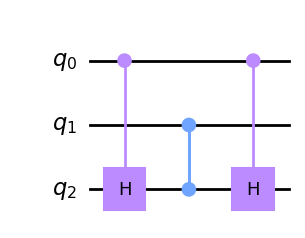

In [18]:
qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw('mpl')

Para el estado $|00\rangle$ en los dos controles, esto no hace nada al objetivo. Para $|11\rangle$, el objetivo experimenta una puerta $Z$ precedida y seguida por una H. El efecto neto es una $X$ en el objetivo. Para los estados $|01\rangle$ y $|10\rangle$, el objetivo experimenta sólo los dos Hadamards \ (que se anulan mutuamente) o sólo el $Z$ \ (que sólo induce una fase relativa). Por lo tanto, esto también reproduce el efecto de una AND, porque el valor del objetivo sólo se cambia para el estado $|11\rangle$ en los controles -- pero lo hace con el equivalente de sólo tres puertas CNOT.




## Rotación arbitraria de H y T. <a id="arbitrary-rotations"></a>

Los qubits de los dispositivos actuales están sujetos a ruido, que consiste básicamente en puertas que se abren por error. Cosas tan simples como la temperatura, los campos magnéticos parásitos o la actividad en qubits vecinos pueden hacer que ocurran cosas que no pretendíamos.

Para las grandes aplicaciones de los ordenadores cuánticos, será necesario codificar nuestros qubits de forma que queden protegidos de este ruido. Esto se consigue haciendo que las puertas sean mucho más difíciles de hacer por error, o de implementar de forma ligeramente errónea.

Esto es desafortunado para las rotaciones de un solo qubit $R_x(\theta)$, $R_y(\theta)$ y $R_z(\theta)$. Es imposible implementar un ángulo $\theta$ con una precisión perfecta, de tal manera que estés seguro de que no estás implementando accidentalmente algo como $\theta + 0.0000001$. Siempre habrá un límite a la precisión que podemos alcanzar, y siempre será mayor de lo tolerable cuando tengamos en cuenta la acumulación de imperfecciones en circuitos grandes. Por lo tanto, **no podremos implementar estas rotaciones directamente en ordenadores cuánticos tolerantes a fallos**, sino que tendremos que construirlas de una manera mucho más deliberada.

Los esquemas tolerantes a fallos suelen realizar estas rotaciones utilizando múltiples aplicaciones de sólo dos puertas: $H$ y $T$.

La puerta T se expresa en Qiskit como `.t()`:

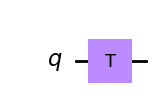

In [19]:
qc = QuantumCircuit(1)
qc.t(0) # Puerta T sobre el qubit 0
qc.draw('mpl')

Es una rotación alrededor del eje z por $\theta = \pi/4$, y así se expresa matemáticamente como $R_z(\pi/4) = e^{i\pi/8~Z}$.

A continuación supondremos que las puertas $H$ y $T$ son efectivamente perfectas. Esto puede lograrse mediante métodos adecuados de corrección de errores y tolerancia a fallos.

Utilizando la puerta Hadamard y los métodos discutidos en el último capítulo, podemos utilizar la puerta T para crear una rotación similar alrededor del eje x.



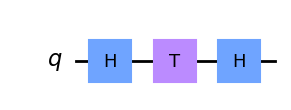

In [20]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw('mpl')

Ahora unamos las dos cosas. Hagamos la puerta $R_z(\pi/4)~R_x(\pi/4)$.

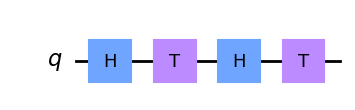

In [21]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw('mpl')

Dado que se trata de una puerta de un solo qubit, podemos pensar en ella como una rotación alrededor de la esfera de Bloch. Eso significa que es una rotación alrededor de algún eje por algún ángulo. No necesitamos pensar demasiado en el eje aquí, pero está claro que no será simplemente x, y o z. Más importante es el ángulo.

La propiedad crucial del ángulo para esta rotación es que es un múltiplo irracional de $\pi$. Puedes demostrarlo tú mismo con un montón de matemáticas, pero también puedes ver la irracionalidad en acción aplicando la puerta. Teniendo en cuenta que cada vez que aplicamos una rotación mayor que $2\pi$, estamos haciendo un módulo implícito por $2\pi$ sobre el ángulo de rotación. Así, repitiendo la rotación combinada antes mencionada $n$ veces se obtiene una rotación alrededor del mismo eje por un ángulo diferente. 

Podemos usar esto a nuestro favor. Cada ángulo estará en algún lugar entre $0$ y $2\pi$. Dividamos este intervalo en $n$ trozos de anchura $2\pi/n$. Para cada repetición, el ángulo resultante caerá en una de estas rebanadas. Si nos fijamos en los ángulos de las primeras $n+1$ repeticiones, debe ser cierto que al menos una rebanada contiene dos de estos ángulos debido al principio de encasillamiento. Utilicemos $n_1$ para denotar el número de repeticiones necesarias para la primera, y $n_2$ para la segunda.


Con esto, podemos demostrar algo sobre el ángulo para $n_2-n_1$ repeticiones. Esto es efectivamente lo mismo que hacer $n_2$ repeticiones, seguido de la inversa de $n_1$ repeticiones. Dado que los ángulos para estos no son iguales (debido a la irracionalidad), pero también difieren en no más de $2\pi/n$ (porque corresponden a la misma rebanada), el ángulo para $n_2-n_1$ repeticiones satisface



$$
\theta_{n_2-n_1} \neq 0, ~~~~-\frac{2\pi}{n} \leq \theta_{n_2-n_1} \leq \frac{2\pi}{n} .
$$

Por lo tanto, tenemos la capacidad de hacer rotaciones alrededor de ángulos pequeños. Podemos usar esto para rotar alrededor de ángulos tan pequeños como queramos, simplemente aumentando el número de veces que repetimos esta puerta.

Mediante el uso de muchas rotaciones de ángulo pequeño, también podemos rotar por cualquier ángulo que nos gusta. Esto no siempre será exacta, pero se garantiza que sea exacta hasta $2\pi/n$, que se puede hacer tan pequeño como nos gusta. Ahora tenemos poder sobre las imprecisiones en nuestras rotaciones.

Hasta ahora, sólo tenemos el poder de hacer estas rotaciones arbitrarias alrededor de un eje. Para un segundo eje, simplemente hacemos las rotaciones $R_z(\pi/4)$ y $R_x(\pi/4)$ en el orden inverso.



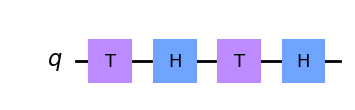

In [22]:
qc = QuantumCircuit(1)
qc.t(0)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw('mpl')

El eje que corresponde a esta rotación no es el mismo que el de la puerta considerada anteriormente. Por lo tanto, ahora tenemos una rotación arbitraria alrededor de dos ejes, que puede utilizarse para generar cualquier rotación arbitraria alrededor de la esfera de Bloch. Volvemos a poder hacerlo todo, aunque cuesta bastantes $T$ compuertas.

POr esto y para este tipo de aplicaciones, las puertas $T$ son tan importantes en la computación cuántica. De hecho, la complejidad de los algoritmos de los ordenadores cuánticos con tolerancia a fallos se suele expresar en términos de cuántas puertas $T$ se necesitan. Esto motiva la búsqueda de logros con el menor número posible de puertas $T$. Nótese que la discusión anterior sólo pretendía demostrar que las puertas $T$ pueden utilizarse de este modo, y no representa el método más eficiente que conocemos.


## Referencias <a id="references"></a>

[1] [Barenco, *et al.* 1995](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457?cm_mc_uid=43781767191014577577895&cm_mc_sid_50200000=1460741020)

[2] [Shende and Markov, 2009](http://dl.acm.org/citation.cfm?id=2011799)

In [23]:
import qiskit.tools.jupyter
%qiskit_version_table